# 1. Introduction

# Predictive Algorithm to Forecast the Onset of Diabetes Mellitus in the Pima Native American population. 
 
**Task**: The task is to build a predictive algorithm using the techniques we learned in this course. 
 
**Objective**: To assess the role of machine learning-based automated software for forecasting diabetes mellitus (DM) by using 8 variables that have been found to be significant risk factors for DM amongst Pimas and other populations. 
 
**Question**: Is it possible to build a predictive algorithm to forecast whether a patient will develop DM based on the data available?   
 
 
**Study Population** as described in the paper “Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus” by Jack W. Smith et al.:   
“The data used in this study were from the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.  
 
Each community resident over 5 years of age was asked to undergo a standardized examination every two years, which included an oral glucose tolerance test.  
 
Diabetes was diagnosed according to World Health Organization Criteria; that is, if the 2-hour post load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care. 
 
Eight variables were chosen to form the basis for forecasting the onset of diabetes within five years in Pima Indian women. Those variables were chosen because they have been found to be significant risk factors for diabetes among Pimas or other populations.” 
 
**Context**: Doctors have developed an intervention that could prevent or delay DM if patients are treated prior to disease onset but it is quite expensive, and they can’t treat everyone. They would like to try to predict who will develop the disease within the next 5 years so that they can target their intervention to those most at risk.  
 
 
Case Selection as described in the paper “Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus” by Jack W. Smith et al.
 
“Diabetes was defined as a plasma glucose concentration greater than 200 mg/dl two hours following the ingestion of 75 g of a carbohydrate solution. Cases were drawn from the pool of examinations which met the following criteria: 
1.	The subject was female. 
2.	The subject was >= 21 years of age at the time of the index examination. An index examination refers to the study that was chosen for use in this model. It does not necessarily correspond to the chronologically first examination for this subject. 
3.	Only one examination was selected per subject. That examination was one that revealed a nondiabetic GTT and met one of the following two criteria: 
 
        a.	Diabetes was diagnosed within five years of the examination, OR 
        
        b.	A GTT performed five or more years later failed to reveal diabetes mellitus. 
 
4.	If diabetes occurred within one year of an examination, that examination was excluded from the study to remove from the forecasting model those cases that were potentially easier to forecast. In 75% of the excluded examinations, DM was diagnosed within six months.” 
 
**Data**: Using these criteria, 1,000 examinations were selected.  This dataset is not the original one. <font color=green>**This dataset has been created specifically for this assignment.**</font>


**Our hypothesis is that Machine Learning algorithms could learn to forecast whether a given individual would develop DM within five years based on the value of the eight input variables.**
**Binary variable "Outcome": 1/Yes, 0/No**
 
 


# 2. Instructions

These are the specifications (step 0 of our machine learning work-flow- Question):

1. We are going to deliver one predictive model to predict diabetes 

2. You will design several machine learning algorithms, choose one, and give a rationale explaining why you choose that algorithm.   
        
5. Use the evaluation metrics that you consider useful to evaluate your models. 

# Question 1: Data dictionary: create a complete data dictionary with clear explanations of the meaning and units of each variable.

The data dictionary below will define and explain the variables present in the dataset.  There are eight predictor variables and one outcome variable.  The eight predictor variables have been chosen due to being significant risk factors for diabetes. The nine variables are :

| Variable | Data Type | Units | Description |
| --- | --- | --- | --- |
| Glucose | Continous | mg/dl (milligram / decilitre) | The plasma glucose concentration at 2 hours in an Oral Glucose Tolerance Test (GTT) |
| Diabetes Pedigree Function | Continous | Relative Unit | An unvalidated measure of the expected genetic influence of affected and unaffected relatives on the subject's eventual diabetes risk |
| Age | Continous | Years | Age of the subject |
| Pregnancies | Continous | Number |  Number of Times Pregnant |
| SkinThickness | Continous | mm (millimeters) | The Triceps Skin Fold Thickness |
| BloodPressure | Continous | mm Hg (millimeters of mercury) | The Diastolic Blood Pressure |
| BMI | Continous | kg/m$^{2}$ (kilogram per meter squared) | The Body Mass Index, calculated by (Weight in kg / (Height in m)$^{2}$) |
| Insulin | Continous | Unit per ml | 2-Hour Serum Insulin |
| Outcome  | Binary | Number | Indicator variable to indicate whether subject was diagnosed with diabetes 5 years after initial examination or was not.  The variable is coded as 1 for "Yes" and 0 for "No" |

In the following sections, I will perform exploratory data analysis on the above variables to clean the data, calculate relevant statistics, and explore relationships between the variables. 

# Question 2: Compute basic general statistics of the data. Clean the data if needed.

Before creating a predictive model for this data, I need to perform exploratory data analysis.  First, I will check and clean the data to ensure the data is ready to be used.  Following this, I will conduct univariate data analysis, including descriptive statistics and visualizations, to understand each of the variables and their respective distributions. Finally, I will conduct bivariate data analysis, including statistical analysis and visualizations, to understand the relationships between the variables.  With an understanding of the variables, I will be able to properly create the predictive models.  

First, I need to load the dataset and examine the contents : 

In [1]:
#import all relevant library for assignment

import sys
import numpy as np
import pandas as pd
from IPython.display import display
from plotnine import *
import warnings; warnings.simplefilter('ignore')

# Importing the necessary packages for logisitic regression, gradient boosted trees, and neural network
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from numpy.random import seed

# Import evaluation metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import accuracy_score

In [2]:
#Load the data

diabetes = pd.read_csv('data/diabetes_final.csv')

#Examine the first few rows
diabetes.head()

#check data types of columns
print(diabetes.dtypes)


Glucose                       int64
Outcome                       int64
DiabetesPedigreeFunction    float64
Age                         float64
Pregnancies                 float64
SkinThickness               float64
BloodPressure               float64
BMI                         float64
Insulin                     float64
dtype: object


With the dataset loaded successfully, I want to double check that there are no missing values :  

In [3]:
#check for missing values
print(diabetes.isnull().sum())

Glucose                     0
Outcome                     0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
SkinThickness               0
BloodPressure               0
BMI                         0
Insulin                     0
dtype: int64


I see that there are no missing values. I will now validate and further understand the variables by computing general descriptive statistics :  

In [4]:
#summary statistics
print(diabetes['Outcome'].value_counts())
diabetes.describe()

0    669
1    331
Name: Outcome, dtype: int64


,Glucose,Outcome,DiabetesPedigreeFunction,Age,Pregnancies,SkinThickness,BloodPressure,BMI,Insulin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.375000,0.331000,0.471447,33.317000,4.144000,23.680000,72.110000,32.737300,92.551000
std,31.540342,0.470809,0.329022,11.916313,3.432644,16.586643,20.008754,8.403568,128.576286
min,0.000000,0.000000,0.084000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,0.000000,0.254000,24.000000,1.000000,11.000000,64.000000,27.600000,0.000000
50%,117.000000,0.000000,0.370000,29.000000,3.000000,25.000000,74.000000,33.100000,23.000000
75%,142.250000,1.000000,0.605001,41.000000,6.000000,37.000000,84.000000,37.500000,136.250000
max,199.000000,1.000000,2.420000,69.000000,19.000000,74.000000,122.000000,67.100000,936.000000


From the statistics above, I observe a few things :
* 331 values of 1 and 669 values of 0 for Outcome.
* All subjects are at least 21 years old.
* Glucose, SkinThickness, BloodPressure, BMI, and Insulin all have minimum values of zero. This data will need to be recoded as missing for use in the model.
* The maximum Pregnancies value is 19. This is high, but from quick research this is possible. No change is needed.

In order to account for the zero values, I need to recode the zero values as missing for the variables Glucose, SkinThickness, BloodPressure, BMI, and Insulin.

In [5]:
#make a copy of original dataset and change zero values to missing
diabetes_two = diabetes.copy(deep = True)
diabetes_two[['Glucose','SkinThickness','BloodPressure','BMI','Insulin']] = diabetes_two[['Glucose','SkinThickness','BloodPressure','BMI','Insulin']].replace(0,np.NaN)

#new count of missing values
print(diabetes_two.isnull().sum())

Glucose                       2
Outcome                       0
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
SkinThickness               204
BloodPressure                31
BMI                          17
Insulin                     348
dtype: int64


There are now missing values that I must account for, especially in the SkinThickness and Insulin columns where missing values are greater than 20%. I know that all of the eight chosen input variables have been identified as risk factors for diabetes, so I choose to not remove the columns.  Also, since the number of observations (1000) is quite large, I won't lose a ton of information by removing records with a NaN value. Therefore, I will remove all records that have a NaN value.  

In [6]:
#create new dataset with Nan records removed
diabetes_reduce = diabetes_two.dropna()

#print the new shape
print(diabetes_reduce.shape)

#make sure no missing values
print(diabetes_reduce.isnull().sum())

(644, 9)
Glucose                     0
Outcome                     0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
SkinThickness               0
BloodPressure               0
BMI                         0
Insulin                     0
dtype: int64


As a result, I know have 644 observations in my dataset. This dataset will be used for the following analysis and model building. 

To get a better idea of the statistical differences between subjects who get diagnosed with diabetes versus those who do not, I also need to analyze the features regarding diabetes diagnosis "Yes" versus "No. 

First, the statistics below are for "Yes" subjects who did get diagnosed with diabetes : 

In [7]:
# Summary of the features regarding subjects with outcome = 1
diabetes_reduce[diabetes_reduce['Outcome'] == 1].describe()

,Glucose,Outcome,DiabetesPedigreeFunction,Age,Pregnancies,SkinThickness,BloodPressure,BMI,Insulin
count,330.000000,330.0,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,144.469697,1.0,0.590734,38.442424,5.645455,33.506061,81.633333,37.711515,160.775758
std,30.553068,0.0,0.383889,12.699401,3.696510,16.130781,19.467269,6.386345,167.720362
min,71.000000,1.0,0.172357,21.000000,0.000000,11.000000,10.000000,21.400000,23.000000
25%,121.250000,1.0,0.332274,28.000000,2.000000,11.000000,76.000000,33.400000,23.000000
50%,146.000000,1.0,0.471221,37.000000,5.000000,38.000000,85.000000,37.200000,100.000000
75%,170.000000,1.0,0.738714,46.000000,8.000000,46.000000,92.000000,41.975000,258.000000
max,199.000000,1.0,2.420000,69.000000,19.000000,74.000000,120.000000,60.300000,936.000000


The statistics below are for "No" subjects who did not get diagnosed with diabetes : 

In [8]:
# Summary of the features regarding subjects with outcome = 1
diabetes_reduce[diabetes_reduce['Outcome'] == 0].describe()

,Glucose,Outcome,DiabetesPedigreeFunction,Age,Pregnancies,SkinThickness,BloodPressure,BMI,Insulin
count,314.000000,314.0,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,110.461783,0.0,0.476997,28.585987,2.875796,27.815287,69.334395,32.025478,124.076433
std,24.091946,0.0,0.309065,9.224599,2.877785,9.282449,11.242589,6.205320,87.844732
min,57.000000,0.0,0.085000,21.000000,0.000000,7.000000,30.000000,19.500000,15.000000
25%,93.000000,0.0,0.259250,23.000000,1.000000,21.250000,62.000000,27.500000,68.500000
50%,107.000000,0.0,0.399000,25.000000,2.000000,28.000000,70.000000,32.150000,97.500000
75%,125.000000,0.0,0.613500,30.000000,4.000000,33.000000,76.000000,35.800000,156.000000
max,197.000000,0.0,2.288000,69.000000,17.000000,56.000000,100.000000,55.000000,600.000000


First, I now observe that there are now 330 values of 1 and 314 values of 0 for Outcome.  Many of the subjects with missing variables were subjects who did not end up with a diabetes diagnosis.  It is important to note that the classes are now approximately balanced. 

I observe the following for subjects who get diagnosed with diabetes : 
* Higher Glucose measurements on average.
* Higher diabetes pedigree function on average. 
* Older on average, however the range is equal.
* More pregnancies on average, though this could be related to higher age on average.
* Higher skin thickness and BMI on average, indicating a positive relationship with weight. 
* Higher Blood Pressure on average.
* Higher insulin measurements on average.

These relationships with the outcome variable will be explored further later on.  

# Question 3: Visualise all the features. Clean the data if needed.

Building on the statistics above, I will know visualize both the univariate distributions and the bivariate relationships of the variables.  I am especially interested in each variable's distribution, how the input variables relate to each other, and how the input variables relate to the outcome variable. 

First, I will plot the breakdown of the outcome variable.  The classes are approximately balanced, which will be useful to know when creating the predictive models : 

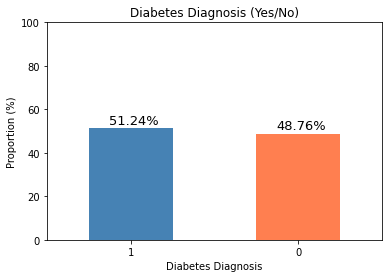

In [9]:
# Plot proportions for each class of 'outcome',
color = ['steelblue', 'coral'] 
ax = (diabetes_reduce.Outcome.value_counts()/len(diabetes_reduce)*100).plot(kind="bar",color=color, rot=0)
ax.set_yticks(np.arange(0, 120,20))
ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Diabetes Diagnosis')
ax.set_title('Diabetes Diagnosis (Yes/No)')

# Adding labels to each bar
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # setting position and format of the bar labels 
    ax.text(i.get_x()+0.12, i.get_height()+2, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13)

Now, I will plot the distributions of each of the variables : 

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

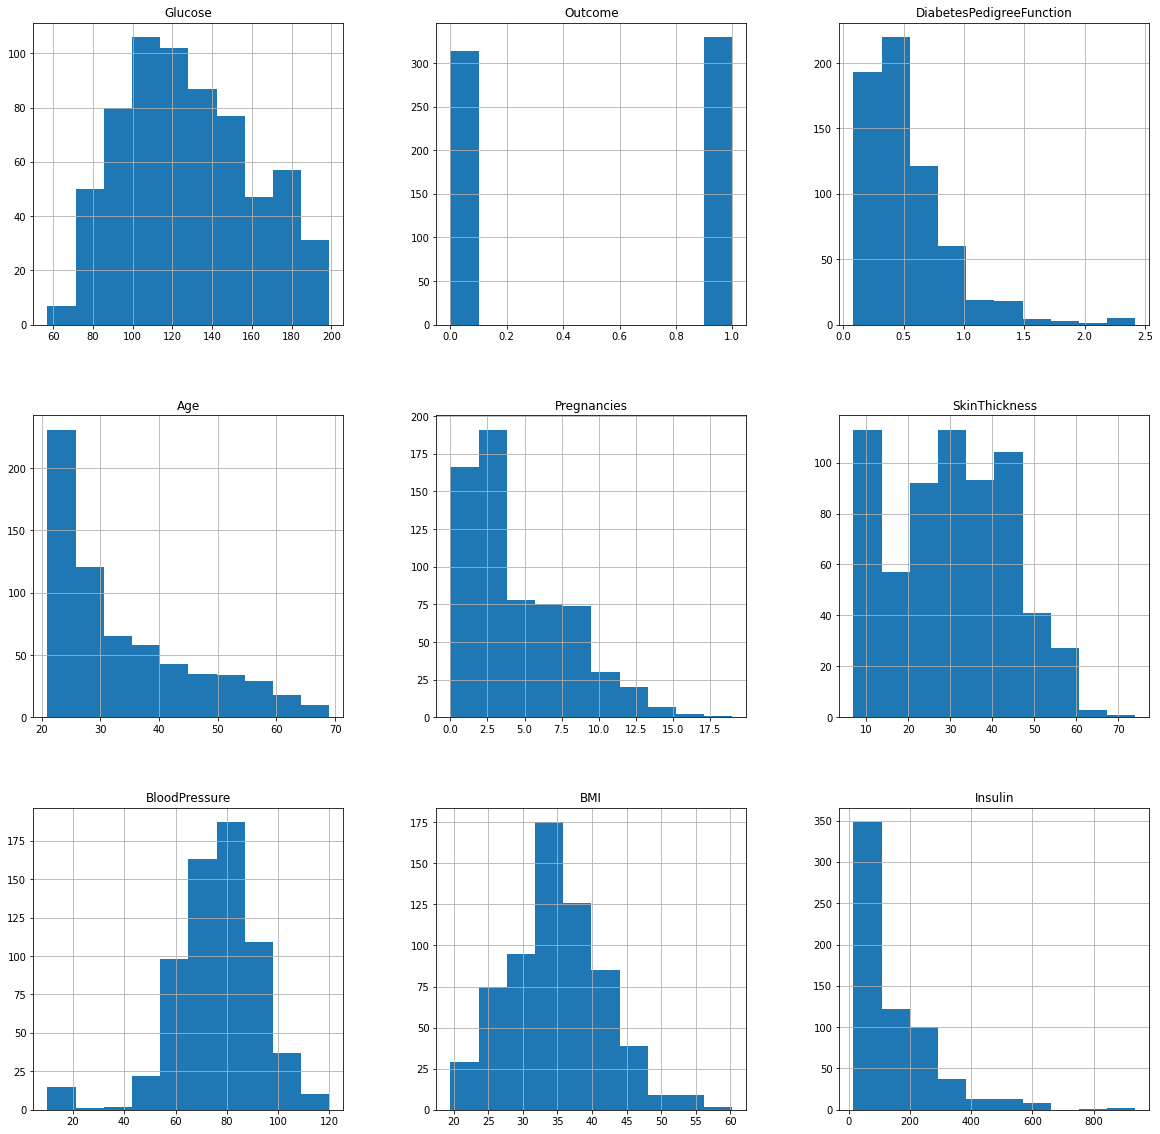

In [10]:
#plot the histograms of each variable
diabetes_reduce.hist(figsize = (20,20))

The following variables exhibit an approximately normal distribution : Glucose, SkinThickness, BloodPressure, BMI. 
The following variables exhibit significant positive (or right) skewness : DiabetesPedigreeFunction, Age, Pregnancies, Insulin.

Below, density plots are used to further visualize the input variables distribution by the outcome variable : 

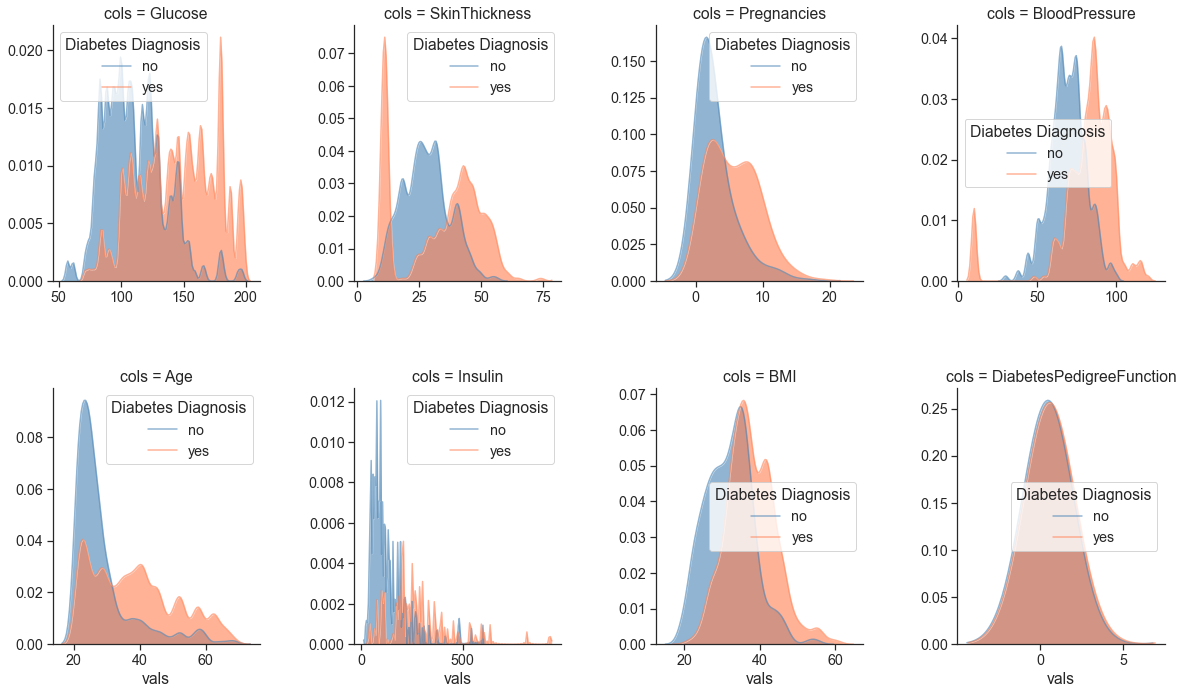

In [11]:
# Transforming our data from wide to long format for our plots. Python command: DataFrame.melt([group variable],var_name,value_name)
diabetes_plot = diabetes_reduce.melt(['Outcome'], var_name='cols', value_name='vals')
diabetes_plot.sort_values('Outcome', inplace=True)

#change Outcome to yes/no for use in plots
diabetes_plot['Outcome'] = np.where(diabetes_plot['Outcome'] == 1,"yes","no")

#Set style and color
sns.set(style="ticks", font_scale=1.3)
pal = dict(yes="coral", no="steelblue")

# Plotting all the variables by outcome
p = sns.FacetGrid(diabetes_plot, col='cols', hue='Outcome',palette=pal, legend_out=False, sharex=False, sharey=False, col_wrap=4)
p = (p.map(sns.kdeplot, "vals", alpha=0.6, shade=True, bw=1.5).add_legend())
p.fig.set_size_inches(17,11)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Diabetes Diagnosis") 

Additionally, boxplots are visualized below to show the same variable breakdown by outcome : 

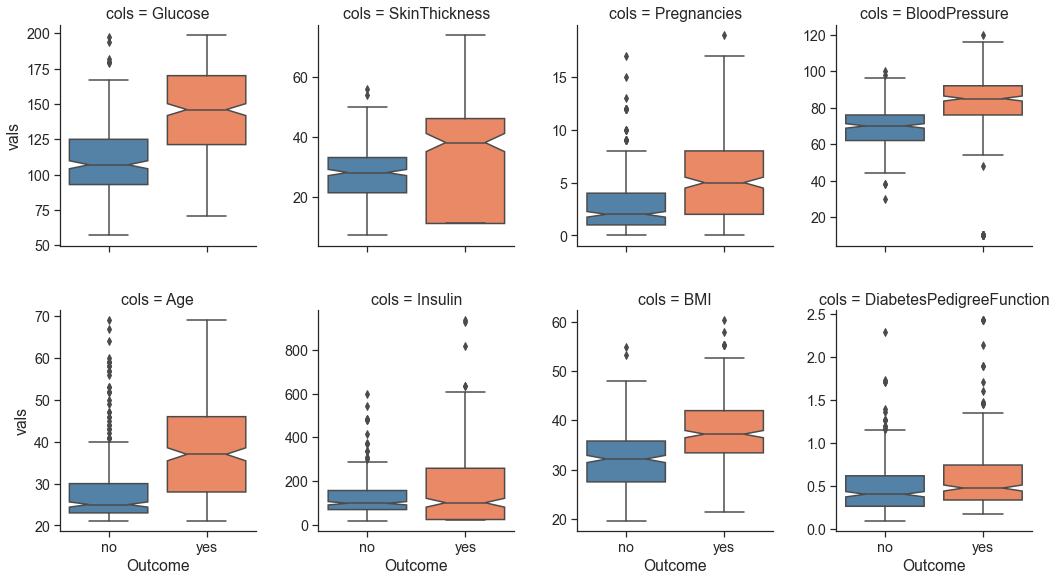

In [12]:
# Box plot of all variables by outcome

#Set style and color
sns.set(style="ticks", font_scale=1.3)

#plot the boxplots
p = sns.axisgrid.FacetGrid(diabetes_plot, col='cols',palette=pal, sharey=False, col_wrap=4)
p = (p.map(sns.boxplot, 'Outcome','vals',palette=pal, notch=True))
p.fig.set_size_inches(15,9)

The plots above offer further insight into the input variables relationship with the outcome.  Input variables which show a significant difference in the distribution between the outcomes include Glucose, SkinThickness, Pregnancies, BloodPressure, Age, Insulin, and BMI. The plots above help show than the DiabetesPedigreeFunction distribution is similar between the outcomes.  It is also interesting to note the SkinThickness bimodel distribution for subjects who were diagnosed with diabetes. Both very low and very high values might have an effect on being diagnosed with diabetes. 

I also want to explore the input variables relationship to each other. This will be important to recognize and adjust for any collinearty in the predictor variables. A correlation matrix and heatmap is displayed below to visualize any correlations between input variables : 

<AxesSubplot:>

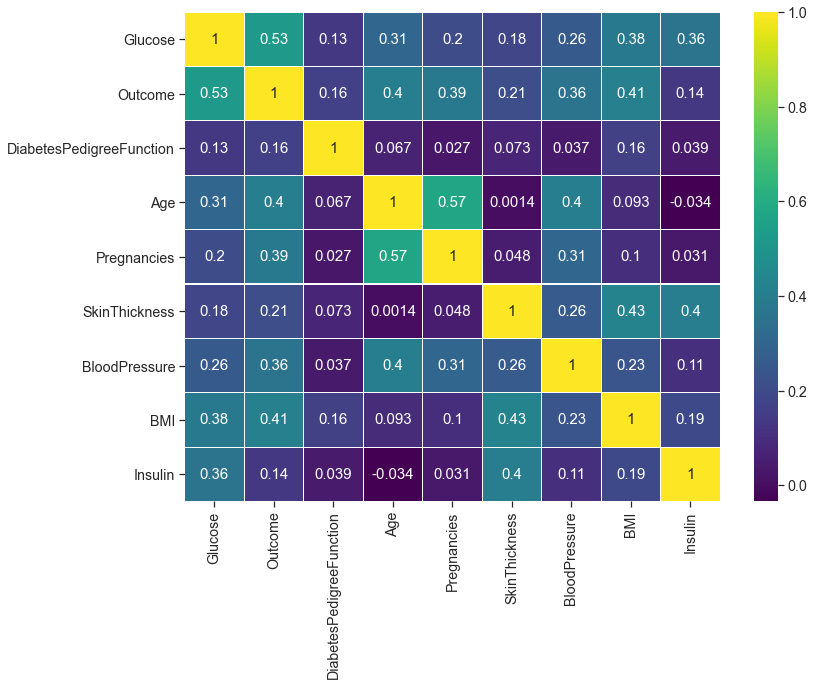

In [13]:
#Plot the correlation matrix
f, ax = plt.subplots(figsize=(12, 9)) # Setting size of the results panel
sns.heatmap(diabetes_reduce.corr() ,linewidths=.1, annot=True, annot_kws={"size": 15}, cmap='viridis', ax=ax)

From above, I observe that Glucose, Age, and BMI all have higher correlations with the Outcome (greater than .4).  Most of the variables show low correlation with other variables. However, I observe that Age has a high correlation with Pregnancies (.57) and BloodPressure (.4).  This supports the idea that number of pregnancies is related to age, and this might have an impact in later models.  Also, I observe that SkinThickness has a high correlation with BMI (.43).  This makes sense as both variables are related to weight, and have similar relationships with weight. 



# Question 4: Choose hyper-parameters and train the next 3 ML models using GridSearchCV 

# 1. Logistic Regression, 
# 2. Gradient Boosted Tree and 
# 3. Dense Neural Network.

In this section, I will use the dataset diabetes_reduce above to build three machine learning models. For each of the three machine learning models, I will find the most optimal hyper-parameters using GridSearchCV. Before I begin training the models, I have a few more steps of data preparation to complete. First, I need to seperate the outcome variable from the features. 

In [14]:
# Dividing the dataset in X (features) and y (outcome)
X = diabetes_reduce.drop(axis=1, columns=['Outcome'])
y = diabetes_reduce['Outcome']

The dataset is split into a training and test set.  20% of the data is set aside to be used as the test dataset. The random state is set to zero to ensure this process is reproducible.   

In [15]:
# Split X and y into 80% train and 20% test data (roughly), set random state for reproducability and stratify responses
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

#check train and test observation number
print(X_train.shape)
print(X_test.shape)

(515, 8)
(129, 8)


Now that I have my training and test datasets ready to go, I can train each of the models.  For reference, the training data set has 515 observations and the test data set has 129 observations.  Due to the expense of the diabetes intervention and the fact that not everyone can be treated, I am interested in a model that has a high accuracy.  This will aid in the targeting of people most at risk of developing diabetes.  Also, accuracy is a good scoring metric to use in this case due to the balanced classes in Outcome, and the importance of true positives. Therefore, prediction accuracy will be used as the scoring metric for each model.  Each section below will train the model for the respective machine learning method.


**Logistic Regression**

In this section, I will fit a logistic model to predict diabetes diagnosis.  A logisitic model has a few parameters (C, class weight, and penalty) that I will tune to choose the optimal parameter selection. The optimal parameters will be the parameters that maximize the accuracy of the model.

Below, the scaling function, logistic model, and pipeline are initialized to be used in GridsearchCV.  Standardized scaling will be used for all of the features in the model.  Since the C, class weight, and penalty hyper-parameters are all going to be tuned, the logistic regression model is also initialized using the _liblearner_ solver.  

In [16]:
# Scaler/Standardization

Scaler = StandardScaler()

# Logistic Model
Log_Reg = LogisticRegression(solver='liblinear')

# PipeLine: 
pipe = Pipeline([('Transform', Scaler), ('Estimator',Log_Reg)])

To find the optimal hyper-parameters to use in the logistic regression model, I first define the parameter grid of values to evaluate. In this model, I am interested in the C estimator, the class weight, and the penalty to use.

The C estimator search space is defined using a range of standard value options at the start. The class weights will fall between 0 and 1, so values are explored from .2 to .8 increasing by .2. Lastly, both the l1 and l2 penalty will be evaluated.

In [17]:
#List of weights to test for .2，.4，.6，.8

weights = (.2,.4,.6,.8)

#Defining the parameters grid:
param_grid_lr = {'Estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'Estimator__class_weight':[{0: x, 1: 1.0-x} for x in weights],
             'Estimator__penalty':['l1','l2']}

#print grid to ensure correct
print("Parameter grid:")
print("C: {}".format(param_grid_lr['Estimator__C']))
print("Class Weight: {}".format(param_grid_lr['Estimator__class_weight']))
print("Penalty: {}".format(param_grid_lr['Estimator__penalty']))

Parameter grid:
C: [0.001, 0.01, 0.1, 1, 10, 100]
Class Weight: [{0: 0.2, 1: 0.8}, {0: 0.4, 1: 0.6}, {0: 0.6, 1: 0.4}, {0: 0.8, 1: 0.19999999999999996}]
Penalty: ['l1', 'l2']


Once the parameter grid is defined, the GridsearchCV object is created using the pipeline defined above, the grid of possible parameters, a cross-validation fold of five, and the scoring metric to maximize is set to _accuracy_. 

In [18]:
#GridsearchCV with five folds
log_reg_gs = GridSearchCV(pipe, param_grid_lr, cv=5,
                          return_train_score=True,scoring='accuracy')

Once the grid_search object is defined, I can then tune the hyper-parameters and train the logisitic regression model using the training data defined above. 

The best parameter options and resulting cross-validation _accuracy_ scores are then printed out. 

In [19]:
#using training data to fit model and find optimal hyper-parameters
log_reg_gs.fit(X_train, y_train)

#print the best parameters and return highest CV score
print("Best parameters: {}".format(log_reg_gs.best_params_))
print("Best cross-validation score: {:.4f}".format(log_reg_gs.best_score_))

# Getting the accuracy from the test and training data
print("Accuracy on training set: {:.3f}".format(log_reg_gs.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(log_reg_gs.score(X_test, y_test)))

Best parameters: {'Estimator__C': 0.001, 'Estimator__class_weight': {0: 0.4, 1: 0.6}, 'Estimator__penalty': 'l2'}
Best cross-validation score: 0.8155
Accuracy on training set: 0.812
Accuracy on test set: 0.791


When maximizing for _accuracy_, the optimal hyper-parameters found are 0.001 for C, (0:0.4,1:0.6) for class weight, and _l2_ for penalty.  With these hyper-parameters the best _accuracy_ cross-validation score is 0.8155. Additionally, the accuracy on the training data is 0.812 and 0.791 for the testing data, which indicates that the model is not over-fitting to the training data. 

Below, I will try a few more hyper-parameter options for C and class weight to check for any performance impact around the selected values. 

The parameter grid is updated to search additional _C_ estimators and class weights close in value to the selected values above.  The penalty remains as _l2_.

In [20]:
# because the best parameters are .4 so compare it to the neighboring ones.
weights = (.3,.35,.45,.5,.55)

#Defining the parameters grid:
param_grid_lr2 = {'Estimator__C': [0.001,0.002],
             'Estimator__class_weight':[{0: x, 1: 1.0-x} for x in weights],
             'Estimator__penalty':['l2']}

#print grid to ensure correct
print("Parameter grid:")
print("C: {}".format(param_grid_lr2['Estimator__C']))
print("Class Weight: {}".format(param_grid_lr2['Estimator__class_weight']))
print("Penalty: {}".format(param_grid_lr2['Estimator__penalty']))

Parameter grid:
C: [0.001, 0.002]
Class Weight: [{0: 0.3, 1: 0.7}, {0: 0.35, 1: 0.65}, {0: 0.45, 1: 0.55}, {0: 0.5, 1: 0.5}, {0: 0.55, 1: 0.44999999999999996}]
Penalty: ['l2']


Same as above, GridSearchCV is used to define the object, tune the hyper-parameters, and train the model using the training data. The resulting best parameters and cross-validation score is printed out. 

In [21]:
#GridsearchCV with five folds
log_reg_gs_2 = GridSearchCV(pipe, param_grid_lr2, cv=5,
                          return_train_score=True,scoring='accuracy')

In [22]:
#using training data to fit model and find optimal hyper-parameters
log_reg_gs_2.fit(X_train, y_train)

#print the best parameters and return highest CV score
print("Best parameters: {}".format(log_reg_gs_2.best_params_))
print("Best cross-validation score: {:.4f}".format(log_reg_gs_2.best_score_))

# Getting the accuracy from the test and training data
print("Accuracy on training set: {:.3f}".format(log_reg_gs_2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(log_reg_gs_2.score(X_test, y_test)))

Best parameters: {'Estimator__C': 0.002, 'Estimator__class_weight': {0: 0.35, 1: 0.65}, 'Estimator__penalty': 'l2'}
Best cross-validation score: 0.8155
Accuracy on training set: 0.816
Accuracy on test set: 0.775


After searching the space around the initial hyper-parameters, the optimal hyper-parameters found are now 0.002 for C, (0:0.35,1:0.65) for class weight, and _l2_ for penalty.  With these hyper-parameters the best _accuracy_ cross-validation score is 0.8155. The accuracy is 0.816 and 0.775 for the training and test data respectively, an increase when compared to the previous model. 

While this new model has a slightly higher value of _accuracy_ for the training data, the _accuracy_ value is actually lower for the test data.  Also, the _accuracy_ increase of .004 for the training data leads to a decrease of .016 for the testing data. Due to this, I choose to use the initial model _log_reg_gs_ with parameters 0.001 for C, (0:0.4,1:0.6) for class weight, and _l2_ for penalty.

**Gradient Boosted Tree**

In this section, I will fit a Gradiest Boosted Tree model to predict diabetes diagnosis.  A Gradiest Boosted Tree model has multiple parameters, depth of the tree, max number of leaves, minimum splitting size, n_estimators, and number of trees in the ensemble, that can be tuned.  Ideally, I would tune all the parameters, but I am constrained by time and computing power.  Therefore, I will only tune the n_estimator, max_leaf_nodes, and learning_rate parameters.  Similar to the Logistic Regression model above, I will find the parameters that maximize _accuracy_. 

The Gradient Boosted Tree does not require scaled features.  As a result, I first define the parameter grid of values to evaluate. In this model, I am interested in the n_estimator, max_leaf_nodes, and learning_rate parameters.

The n_estimator search space is defined using a range of values from 10 to 100. The learning_rate will fall between 0 and 1, so values are explored from .01 to .5. Lastly, the max_leaf_nodes search space is defined using a range of values from 2 to 20.

In [23]:
#Defining the parameters grid:
param_grid_gbt = {'n_estimators': [10,25,50,75,100],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_leaf_nodes': [2,5,10,15,20]} 

#print grid to ensure correct
print("Parameter grid:")
print("C: {}".format(param_grid_gbt['n_estimators']))
print("Class Weight: {}".format(param_grid_gbt['learning_rate']))
print("Penalty: {}".format(param_grid_gbt['max_leaf_nodes']))

Parameter grid:
C: [10, 25, 50, 75, 100]
Class Weight: [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Penalty: [2, 5, 10, 15, 20]


Once the parameter grid is defined, I first create the GradiestBoostingClassifier tree.  The random_state is set to zero for reproducibility purposes.  Then the the GridsearchCV object is created using the gbt object, grid of possible parameters, a cross-validation fold of five, and the scoring metric to maximize is set to _accuracy_. 

In [24]:
#initialize the GBT 
gbt = GradientBoostingClassifier(random_state=0)

#GridsearchCV with five folds
gbt_gs = GridSearchCV(gbt, param_grid=param_grid_gbt, cv=5, scoring = 'accuracy')

Once the grid_search object is defined, I can then tune the hyper-parameters and train the Gradient Boosted Tree model using the training data defined above. 

The best parameter options and resulting cross-validation _accuracy_ score are then printed out. 

In [25]:
#using training data to fit model and find optimal hyper-parameters
gbt_gs.fit(X_train, y_train)

#print the best parameters and return highest CV score
print("Best parameters: {}".format(gbt_gs.best_params_))
print("Best cross-validation score: {:.4f}".format(gbt_gs.best_score_))

# Getting the accuracy from the test and training data
print("Accuracy on training set: {:.3f}".format(gbt_gs.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbt_gs.score(X_test, y_test)))

Best parameters: {'learning_rate': 0.3, 'max_leaf_nodes': 5, 'n_estimators': 100}
Best cross-validation score: 0.9301
Accuracy on training set: 1.000
Accuracy on test set: 0.853


When maximizing for _accuracy_, the optimal hyper-parameters found are 0.3 for learning rate, 5 for max leaf nodes, and 100 estimators.  With these hyper-parameters the best _accuracy_ cross-validation score is 0.9301. Additionally, the accuracy on the training data is 1 and 0.853 for the testing data.  Due to 100% accuracy on the training data, I am worried about potential overfitting on the training data.  Since the number of features in the dataset is low, I am worried that 100 estimators might be too many.  As a result, I am going to choose smaller values of estimators and keep the same search space for learning rate and max leaf nodes below. 

In [26]:
#Defining the parameters grid:
param_grid_gbt_2 = {'n_estimators': [5,10,15,20,25],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'max_leaf_nodes': [2,5,10,15,20]} 

#print grid to ensure correct
print("Parameter grid:")
print("C: {}".format(param_grid_gbt_2['n_estimators']))
print("Class Weight: {}".format(param_grid_gbt_2['learning_rate']))
print("Penalty: {}".format(param_grid_gbt_2['max_leaf_nodes']))

Parameter grid:
C: [5, 10, 15, 20, 25]
Class Weight: [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
Penalty: [2, 5, 10, 15, 20]


Once the parameter grid is defined, I create a new GridsearchCV object is created using the gbt object, the new grid of possible parameters, a cross-validation fold of five, and the scoring metric to maximize is set to _accuracy_. 

In [27]:
#GridsearchCV with five folds
gbt_gs_2 = GridSearchCV(gbt, param_grid=param_grid_gbt_2, cv=5, scoring = 'accuracy')

Once the grid_search object is defined, I can then tune the hyper-parameters and train the Gradient Boosted Tree model using the training data defined above. 

The best parameter options and resulting cross-validation _accuracy_ score are then printed out.

In [28]:
#using training data to fit model and find optimal hyper-parameters
gbt_gs_2.fit(X_train, y_train)

#print the best parameters and return highest CV score
print("Best parameters: {}".format(gbt_gs_2.best_params_))
print("Best cross-validation score: {:.4f}".format(gbt_gs_2.best_score_))

# Getting the accuracy from the test and training data
print("Accuracy on training set: {:.3f}".format(gbt_gs_2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbt_gs_2.score(X_test, y_test)))

Best parameters: {'learning_rate': 0.2, 'max_leaf_nodes': 10, 'n_estimators': 10}
Best cross-validation score: 0.9243
Accuracy on training set: 0.950
Accuracy on test set: 0.829


After reducing the estimator parameters and searching the space around the initial hyper-parameters, the optimal hyper-parameters found are now 0.2 for learning rate, 10 for max leaf nodes, and 10 estimators. With these hyper-parameters the best _accuracy_ cross-validation score is 0.9243. The accuracy is 0.95 and 0.829 for the training and test data respectively. While this is a decrease from the initial model, I am more comfortable using the simpler model above as I am less worried the model is overfitting to the training data.  The overall performance loss was minimal, and this model should generalize better to future data.  Therefore, this model will be used due to being the most useful to target future at risk patients. 

**Dense Neural Network**

In this section, I will fit a Dense Neural Network model to predict diabetes diagnosis.  A Dense Neural Network model has multiple parameters to be optimized including epochs, batch size, and the dropout parameter for _l1_ regularization.  The _l1_ regularization is a technique used to decrease overfitting.  By dropping nodes throughout the training process, the ability of the network to specialize is reduced, and thus overfitting prevented. Similar to both models above, I will find the parameters that maximize _accuracy_. 

Scaled features are needed to train Dense Neural Network models.  Similar to the Logisitic Regression model, I will define a pipeline to be used during cross validation to ensure the proper scaling is carried out within each fold of the training data.  I will also define the parameter grid of values to evaluate. In this model, I am interested in the epochs, batch size, and dropout. 

Below, the "skeleton" of the neural network model is created. This function is used to define the first hidden layer and inputs, subsequent hidden layers, the dropout layer, and the final output layer. The optimizer, loss function, and scoring metric are also defined in the function.  The input layer is added with 9 neurons, to account for the 8 features and an extra neuron for a bias term.  The hidden layer is then added with 5 neurons, the mean between the input layer and the final output layer. Finally, the output layer has one neuron to account for the binary classification problem. The _adam_ optimizer, _binary_crossentropy_ loss function, and _accuracy_ metric are used to compile the final model.  

In [29]:
def create_model(DropoutL1):
    
    # Initiate model
    model = tensorflow.keras.Sequential()
    # Add first hidden layer and input
    model.add(Dense(9, activation='relu', input_dim = X_train.shape[1], kernel_initializer='uniform'))
    # Apply dropout to outputs of hidden layer1 
    model.add(Dropout(0.5))  
    # Add second hidden layer
    model.add(Dense(5, activation = 'relu', kernel_initializer='uniform'))
    # Add output layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

Below, the scaling function, neural network model, and pipeline are initialized to be used in GridsearchCV.  Standardized scaling will be used for all of the features in the model.  Since the epoch, batch size, and dropout hyper-parameters are all going to be tuned, the neural network model is also initialized using the create_model function from above. I also include the verbose = 0 option to suppress the training output for the neural network.

In [30]:
#define scaler
Scaler = StandardScaler()

#define neural network model 
ann = KerasClassifier(build_fn=create_model,verbose=0)

#define the pipeline
ann_pipe=Pipeline([('Transform', Scaler), ('ANN', ann)])

The parameter grid is defined below. Since these models can take a long time to train, I will use only a couple values for both epoch and batch size. For epochs, I will define the search space as 50 and 100. Since I only have 515 training observations, I will define the search space for batch size as 50 and 100. Lastly, the dropout search space is defined using either .2 or .4. 

In [31]:
# Create grid for testing density options.
param_grid_ann = {'ANN__epochs':[50, 100],
              'ANN__batch_size': [50, 100],
              'ANN__DropoutL1':[0.2,0.4]} 

#print grid to ensure correct
print("Parameter grid:")
print("C: {}".format(param_grid_ann['ANN__epochs']))
print("Class Weight: {}".format(param_grid_ann['ANN__batch_size']))
print("Penalty: {}".format(param_grid_ann['ANN__DropoutL1']))

Parameter grid:
C: [50, 100]
Class Weight: [50, 100]
Penalty: [0.2, 0.4]


Once the parameter grid is defined, I create a new GridsearchCV object is created using the ann object, the grid of possible parameters, a cross-validation fold of two, and the scoring metric to maximize is set to _accuracy_. I also initialize a random seed, to ensure reproducibility in the future. 

In [32]:
#initialize random seed
tensorflow.random.set_seed(9)

# Establish GridSearchCV
ann_gs = GridSearchCV(estimator = ann_pipe, param_grid = param_grid_ann, cv=2, scoring='accuracy')

Once the grid_search object is defined, I can then tune the hyper-parameters and train the Neural Network model using the training data defined above. 

The best parameter options and resulting cross-validation _accuracy_ score are then printed out.

In [33]:
#using training data to fit model and find optimal hyper-parameters
ann_gs.fit(X_train, y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 81        
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Transform',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ANN',
                                        <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001AF4905D808>)],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'ANN__DropoutL1': [0.2, 0.4],
                         'ANN__batch_size': [50, 100],
                         'ANN__epochs': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
#print the best parameters and return highest CV score
print("Best parameters: {}".format(ann_gs.best_params_))
print("Best cross-validation score: {:.4f}".format(ann_gs.best_score_))

# Getting the accuracy from the test and training data
print("Accuracy on training set: {:.3f}".format(ann_gs.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ann_gs.score(X_test, y_test)))

Best parameters: {'ANN__DropoutL1': 0.2, 'ANN__batch_size': 50, 'ANN__epochs': 100}
Best cross-validation score: 0.8252
Accuracy on training set: 0.852
Accuracy on test set: 0.806


The optimal hyper-parameters found the neural network are 0.2 for dropout, 50 for batch size, and 100 for epochs. With these hyper-parameters the best _accuracy_ cross-validation score is 0.8252. The accuracy is 0.852 and 0.806 for the training and test data respectively. There is no evidence of overfitting, and the model performs reasonably well in the task of predicting patients diagnosed with diabetes.  

# Question 5: Evaluate the 3 models.

In this section, each of the three models will be evaluated using the same evaluation techniques.  The test data set will be used for all evaluations.  The model predictions are compared to the true values of the test data,  this  is needed to examine the model's performance on future real world data.  The following evaluation technqiues will be used : 

* Classification Report - Measure the precision,recall, and f1-score of the models
* Confusion Matrix - Measure and quantify the volume of false positives and false negatives
* ROC Curve - Measure the diagnostic ability of the classifiers
* Cumulative Gains Curve - Measure the percentage of patients who have diabetes diagnosis within top X% of sample

All of these evaluation methods will be needed to measure the model performance in the context of the real world setting.  The intervention for patients at risk of diabetes is quite expensive, and not everyone can be treated. Therefore, the model will need to do a good job of identifying the highest risk patients without targeting patients not likely to develop diabetes (false positives).  I want to ensure the model has a high f1-score to balance recall and precision (both important in this context) and a high lift from the cumulative gains chart.  This will be further explained and evaluated in the rest of this section. 

**Logisitic Regression**

First, the predicitions must be generated using the test data. The _log_reg_pred_ object is defined below. 

In [35]:
# Generate predictions for test data based on the logistic regression model with best parameters generated by GridSearchCV 
log_reg_pred = log_reg_gs.predict(X_test)

Below, the classification report is printed out to evaluate the resulting scoring metrics such as _precision_, _recall_, and the overall _f1_ score.  The overall _f1_ score is 0.79, which is a reasonably good value.  I also see that for the diabetes population, the _precision_ is 0.77 and _recall_ is 0.85. The _accuracy_ is also included. 

In this context, lower precision means that patients who don't need the intervention may receive it.  There is a financial consequence here, as the intervention is expensive and money could be wasted.  Also, lower recall means that patients who need the intervention are not receiving it.  There is a quality of care and financial consequence here, as patients that develop diabetes are not receiving the intervention they need.  This leads to poor health outcomes and long term financial impact due to the expense of chronic disease care. 

Due to this, I would place a higher emphasis on acheiving higher recall values compared to precision, though both are important and need to be considered. 

In [36]:
#print classification report
print(classification_report(y_test, log_reg_pred))

#print test accuracy
print("Accuracy on test set: {:.3f}".format(log_reg_gs.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        63
           1       0.77      0.85      0.81        66

    accuracy                           0.79       129
   macro avg       0.79      0.79      0.79       129
weighted avg       0.79      0.79      0.79       129

Accuracy on test set: 0.791


Below, a confusion matrix is created and visualized to dive deeper into the model performance on the test data. The numbers in the confusion matrix can be used to perform further analysis and ROI estimates concering the intervention program. For example, if we treated all patients predicted to have a diabetes diagnosis, 17 out of the 73 patients would not actually need the intervention. This would lead to a "waste" of resources and could be calculated to find a dollar value. 

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

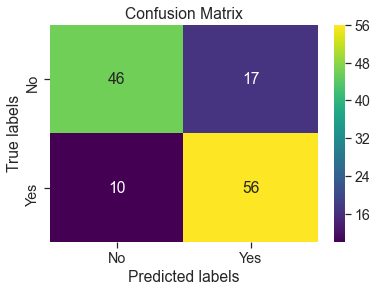

In [37]:
# Generate and visualize confusion matrix for evaluation

labels = [0, 1]

# Confusion Matrix
cm = metrics.confusion_matrix(y_true = y_test, y_pred = log_reg_pred, labels=labels)

# Visualising the confusion matrix 
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

Below, a ROC curve is plotted to further analyze the diagnostic ability of the logisitic regression model.  The ROC curve visualizes the trade-off between the True Positive Rate and False Positive Rate. A curve closer to the top-left indicates better model performance. The curve below appears reasonably good. 

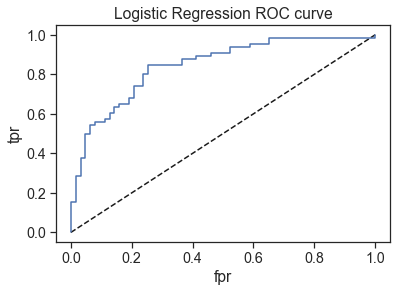

In [38]:
#ROC Curve

#calculate predicted probabilities
log_reg_prob = log_reg_gs.predict_proba(X_test)
#calculate the values to plot
fpr, tpr, thresholds = roc_curve(y_test, log_reg_prob[:,1])

#plot the curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

Finally, a cumulative gains curve is visualized below.  The cumulative gains chart shows the percentage of each class captured by taking X% sample of the population.  The X% sample of the population considers the highest probabilities first.  From below, I see that approximately 80% of patients who develop diabetes are captured in 50% of the population.  This equates to a 80/50 or 1.6X lift.  This is an important evaluation metric to consider, because I can quantify the cost of administering the intervention to a segment of the population and how many patients I can help as a result.  This is useful in targeting the most at risk patients when not everyone can receive the intervention. 

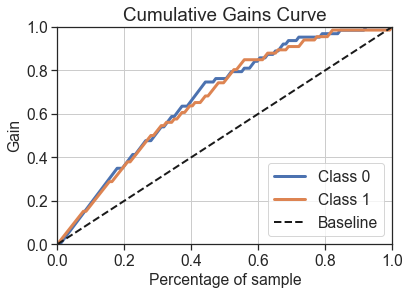

In [39]:
#Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_test, log_reg_prob)
plt.show()

**Gradient Boosted Tree**

I will know repeat the above evaluation analysis for the Gradient Boosted Tree model.  I won't repeat the explanations of each evaluation, but merely highlight the values.  First, the predicitions must be generated using the test data. The _gbt_pred_ object is defined below. 

In [40]:
# Generate predictions for test data based on the gradient boosted tree model with best parameters generated by GridSearchCV 
gbt_pred = gbt_gs_2.predict(X_test)

Below, the classification report is printed out to evaluate the resulting scoring metrics such as _precision_, _recall_, and the overall _f1_ score.  The overall _f1_ score is 0.83, which is an improvement compared to the logistic regression model.  I also see that for the diabetes population, the _precision_ is 0.82 and _recall_ is 0.85. The _recall_ is the same as the logistic regression model, but there was an improvement in the _precision_ and _f1_ score. The _accuracy_ on the test data is also included. 

In [41]:
#print classification report
print(classification_report(y_test, gbt_pred))

#print test accuracy
print("Accuracy on test set: {:.3f}".format(gbt_gs_2.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        63
           1       0.82      0.85      0.84        66

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129

Accuracy on test set: 0.829


Below, a confusion matrix is created and visualized to dive deeper into the model performance on the test data. It is clear to see that while the false negatives (10) remained the same compared to the logistic regression model, there are now less false positives (12 compared to 17) and as a result more true negatives. 

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

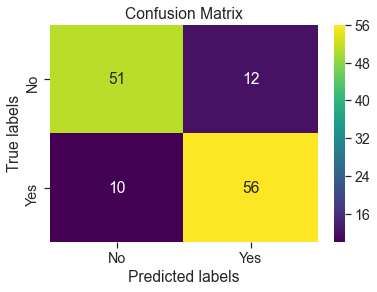

In [42]:
# Generate and visualize confusion matrix for evaluation

labels = [0, 1]

# Confusion Matrix
cm = metrics.confusion_matrix(y_true = y_test, y_pred = gbt_pred, labels=labels)

# Visualising the confusion matrix 
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

Below, a ROC curve is plotted to further analyze the diagnostic ability of the logisitic regression model.  There is clear improvement here compared to the logistic regression model as the curve more closely approaches the top left corner.

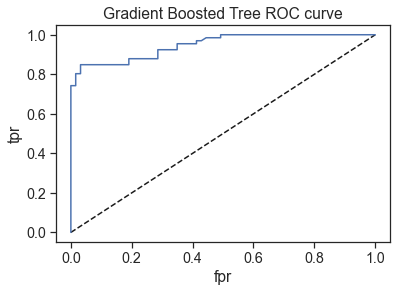

In [43]:
#ROC Curve

#calculate predicted probabilities
gbt_prob = gbt_gs_2.predict_proba(X_test)
#calculate values to plot
fpr, tpr, thresholds = roc_curve(y_test, gbt_prob[:,1])

#plot
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Boosted Tree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gradient Boosted Tree ROC curve')
plt.show()

Finally, a cumulative gains curve is visualized below.  From below, I see that approximately 80% of patients who develop diabetes are captured in 40% of the population.  This equates to a 80/40 or 2X lift. 

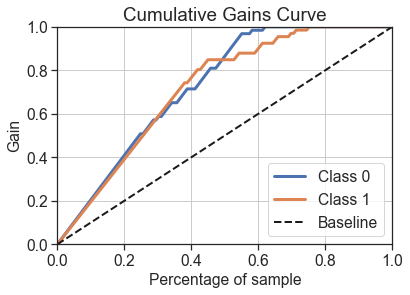

In [44]:
#Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_test, gbt_prob)
plt.show()

**Dense Neural Network**

I will know repeat the above evaluation analysis for the Dense Neural Network model.  I won't repeat the explanations of each evaluation, but merely highlight the values.  First, the predicitions must be generated using the test data. The _ann_pred_ object is defined below. 

In [45]:
# Generate predictions for test data based on the neural network model with best parameters generated by GridSearchCV 
ann_pred = ann_gs.predict(X_test)

Below, the classification report is printed out to evaluate the resulting scoring metrics such as _precision_, _recall_, and the overall _f1_ score.  The overall _f1_ score is 0.81, which is between the logistic regression and gradient boosted tree models.  I also see that for the diabetes population, the _precision_ is 0.80 and _recall_ is 0.83. The _recall_ is slightly lower than the above models, and the _precision_ and _f1_ scores were slightly lower than the gradiest boosted tree model.  The _accuracy_ on the test data is also included. 

In [46]:
#print classification report
print(classification_report(y_test, ann_pred))

#print test accuracy
print("Accuracy on test set: {:.3f}".format(ann_gs.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        63
           1       0.80      0.83      0.81        66

    accuracy                           0.81       129
   macro avg       0.81      0.81      0.81       129
weighted avg       0.81      0.81      0.81       129

Accuracy on test set: 0.806


Below, a confusion matrix is created and visualized to dive deeper into the model performance on the test data. It is clear to see that the false negatives increased by one (11), and false positives increased by two (14) compared to the gradient boosted tree.

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

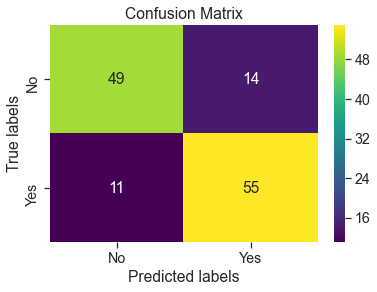

In [47]:
# Generate and visualize confusion matrix for evaluation

labels = [0, 1]

# Confusion Matrix
cm = metrics.confusion_matrix(y_true = y_test, y_pred = ann_pred, labels=labels)

# Visualising the confusion matrix 
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

Below, a ROC curve is plotted to further analyze the diagnostic ability of the neural network model.  The curve here looks slightly worse compard to the gradient boosted tree model. 

Instructions for updating:
Please use `model.predict()` instead.


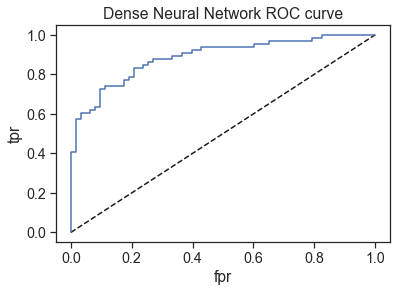

In [48]:
#ROC Curve

#calculate the predicted probabilities
ann_prob = ann_gs.predict_proba(X_test)
#calculate values to plot
fpr, tpr, thresholds = roc_curve(y_test, ann_prob[:,1])

#plot
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Dense Neural Network')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Dense Neural Network ROC curve')
plt.show()

Finally, a cumulative gains curve is visualized below.  From below, I see that approximately 80% of patients who develop diabetes are captured in 50% of the population, similar to the logistic regression model.

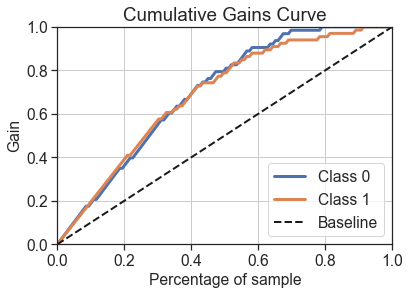

In [49]:
#Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_test, ann_prob)
plt.show()

# Question 6: "Ensemble averaging is the process of creating multiple models and combining them to produce a desired output".[https://en.wikipedia.org/wiki/Ensemble_averaging_(machine_learning)]. 

# In this question, calculate the average of the probabilities predicted by each of the previous trained models.

# Use this average probability to predict the final class.



In this section, the three models above will be combined to form an ensemble model. Many times, an ensemble model can lead to an improvement over the individual models.  Certain models may capture information about the data in different ways, and this information can be combined to form better predictions by using ensemble models.  

The three model's predicted probabilities will be averaged together and the final average will determine the predicted class.  By creating an ensemble method, the predictions should hopefully be improved. 

In [50]:
# Model Averaging

#average of three model's predicted probabilities
ens_prob = (log_reg_prob+gbt_prob+ann_prob)/3

#predict the final class

#initialize prediction array
ens_pred = np.zeros_like(log_reg_pred)

#change prediction to 1 where the probability of class 1 is greater than 0.5
ens_pred[np.where(ens_prob[:,1]>.5)] = 1

# Question 7: Evaluate the new ensemble "model" created in question 6.

With the calculated ensemble predictions, I will now re-evaluate this model using the same evaluation methods from Question 5.

Below, the classification report is printed out to evaluate the resulting scoring metrics such as _precision_, _recall_, and the overall _f1_ score.  The overall _f1_ score is 0.85, which is higher than all of the individual models.  I also see that for the diabetes population, the _precision_ is 0.84 and _recall_ is 0.86. All three of _recall_, _precisions_, and _f1_ score are higher in the ensemble model for the diabetes population.  The accuracy on the test data is also included.  The ensemble model's _accuracy_ is higher than the three individual models.   

In [51]:
#print classification report
print(classification_report(y_test, ens_pred))

#print test accuracy
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, ens_pred)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        63
           1       0.84      0.86      0.85        66

    accuracy                           0.84       129
   macro avg       0.85      0.84      0.84       129
weighted avg       0.85      0.84      0.84       129

Accuracy on test set: 0.845


Below, a confusion matrix is created and visualized to dive deeper into the model performance on the test data. It is clear to see that both the false negatives (9) and false positives (11) were reduced when compared to all of the individual models. 

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

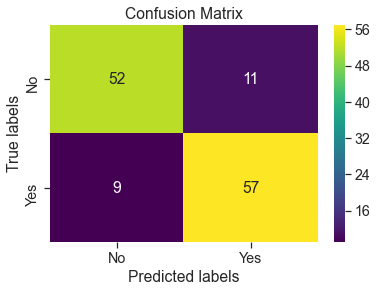

In [52]:
# Generate and visualize confusion matrix for evaluation

labels = [0, 1]

# Confusion Matrix
cm = metrics.confusion_matrix(y_true = y_test, y_pred = ens_pred, labels=labels)

# Visualising the confusion matrix 
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.0f', ax= ax, cmap="viridis")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

Below, a ROC curve is plotted to further analyze the diagnostic ability of the logisitic regression model.  The curve here is similar to the gradiest boosted tree ROC curve, however the initial spike is reduced (due to averaging down of prediction probabilities).  

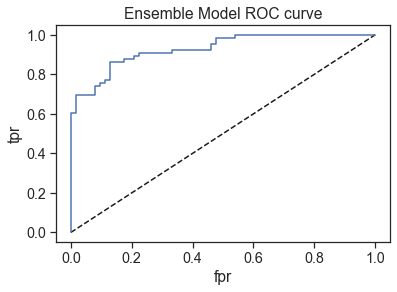

In [53]:
#ROC Curve

#calculate the predicted probabilities
ann_prob = ann_gs.predict_proba(X_test)
#calculate values to plot
fpr, tpr, thresholds = roc_curve(y_test, ens_prob[:,1])

#plot
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Ensemble Model')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Ensemble Model ROC curve')
plt.show()

Finally, a cumulative gains curve is visualized below.  From below, I see that approximately 80% of patients who develop diabetes are captured in 50% of the population, similar to the logistic regression and neural network models. This is a little worse than the gradiest boosted tree model, which was able to capture 80% of patients who develop diabetes in 40% of the population. 

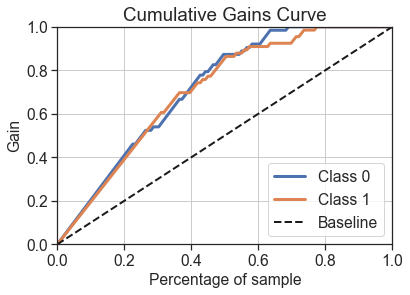

In [54]:
#Cumulative Gains Curve
skplt.metrics.plot_cumulative_gain(y_test, ens_prob)
plt.show()

# Question 8: 

# Print all the evaluation metrics together in order to compare the 4 models:

# a. Choose the best model or none of them according to the evaluation metrics that you selected and this specific context/application of the predictive model.

# b. Provide a discussion and conclusion statement about your work and the justification for your choice of model.

In order to choose the final model, I will compare each of the model's recall, precision, f1-score, and cumulative gains chart.  

To reiterate the importance of _recall_ and _precision_ in this context, lower precision means that patients who don't need the intervention may receive it.  There is a financial consequence here, as the intervention is expensive and money could be wasted.  Also, lower recall means that patients who need the intervention are not receiving it.  There is a quality of care and financial consequence here, as patients that develop diabetes are not receiving the intervention they need.  This leads to poor health outcomes and long term financial impact due to the expense of chronic disease care. A model with both a high _recall_ and _precision_ is ideal.

Additionally, since not everyone can receive the intervention, the model should do a good job of identifying the most at risk patients.  The cumulative gains chart is an important evaluation metric to consider, because I can quantify the cost of administering the intervention to a segment of the population and how many patients I can help as a result.  This is useful in targeting the most at risk patients when not everyone can receive the intervention.

Below, the classification report is printed for each of the models.  It is clear to see that the ensemble model results in the highest _recall_ and _precision_ for the patients who developed diabetes : 

In [55]:
#Classification report

print('The classification report for the Logistic Regression Model : ')
print("\n")
print(classification_report(y_test, log_reg_pred))

print("\n")
print('The classification report for the Gradient Boosted Tree Model : ')
print("\n")
print(classification_report(y_test, gbt_pred))

print("\n")
print('The classification report for the Neural Network Model : ')
print("\n")
print(classification_report(y_test, ann_pred))

print("\n")
print('The classification report for the Ensemble Model : ')
print("\n")
print(classification_report(y_test, ens_pred))


The classification report for the Logistic Regression Model : 


              precision    recall  f1-score   support

           0       0.82      0.73      0.77        63
           1       0.77      0.85      0.81        66

    accuracy                           0.79       129
   macro avg       0.79      0.79      0.79       129
weighted avg       0.79      0.79      0.79       129



The classification report for the Gradient Boosted Tree Model : 


              precision    recall  f1-score   support

           0       0.84      0.81      0.82        63
           1       0.82      0.85      0.84        66

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129



The classification report for the Neural Network Model : 


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        63
           1       0.80      0.83      0.

Below, the cumulative gains chart is visualized for each of the models.  The only chart that shows a clear improvement over the others is the Gradient Boosted Tree model.  The Neural Network, Gradiest Boosted Tree, and Ensemble models capture approximately 60% of the patients who develop diabetes in about 30% of the population.  However, the Gradient Boosted Tree model then captures 80% of the patients who develop diabetes in about 40% of the population, whereas the Neural Network and Ensemble model capture 80% in 50% of the population.

The Cumulative Gains Chart for the Logistic Regression Model : 




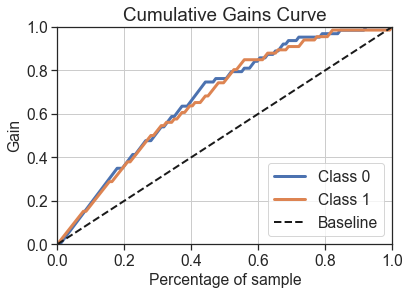



The Cumulative Gains Chart for the Gradiest Boosted Tree Model : 




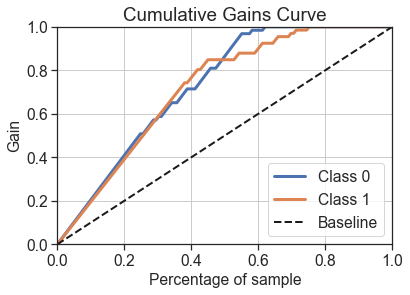



The Cumulative Gains Chart for the Neural Network Model : 




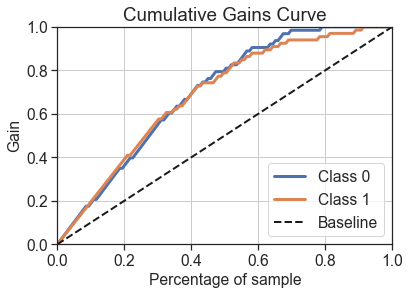



The Cumulative Gains Chart for the Ensemble Model : 




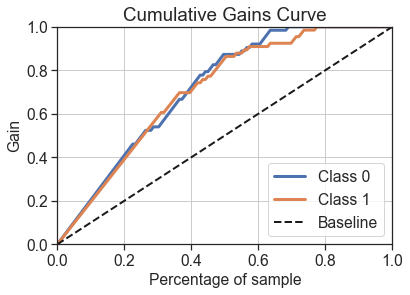

In [56]:
#Cumulative Gains Curve

print('The Cumulative Gains Chart for the Logistic Regression Model : ')
print("\n")
skplt.metrics.plot_cumulative_gain(y_test, log_reg_prob)
plt.show()
print("\n")

print('The Cumulative Gains Chart for the Gradiest Boosted Tree Model : ')
print("\n")
skplt.metrics.plot_cumulative_gain(y_test, gbt_prob)
plt.show()
print("\n")

print('The Cumulative Gains Chart for the Neural Network Model : ')
print("\n")
skplt.metrics.plot_cumulative_gain(y_test, ann_prob)
plt.show()
print("\n")

print('The Cumulative Gains Chart for the Ensemble Model : ')
print("\n")
skplt.metrics.plot_cumulative_gain(y_test, ens_prob)
plt.show()
print("\n")


After consideration of the evaluation metrics above and the context of the predictive model, it is my opinion that the Gradient Boosted Tree is the best model out of the four options.  While the Ensemble model has a slightly higher _recall_ and _precision_, I think the benefits of the Gradient Boosted Trees high cumulative gains outweighs the small number of misclassifications.  Since the intervention can only be administered to a small percentage of the population, the model that captures the most patients who would benefit from the intervention will be the most useful. 

There are limited consequences for misclassification, patients who don't need the intervention and receive it only results in a waste of resources, I assume that there is no health risk involved.  For patients who need the intervention but don't receive it, there is a long term financial impact and health risk involved, but this is outweighed by a higher proportion of other people who need the intervention receiving it.  

One thing to consider is how many patients they can afford to intervene on.  If the percentage of the population receiving the intervention is low (less than <40%), then the Gradient Boosted Tree and the Ensemble model perform almost identically in identifying the most at risk patients.  In this case, I would choose to use the Ensemble model due to better overall _accuracy_ and _f1_ score.  

#####################################################################################
#####################################################################################